In [255]:
import pandas as pd
import numpy as np

In [256]:
df = pd.read_csv('Phishing_Email.csv')

In [257]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [258]:
df = df.drop(columns='Unnamed: 0')

In [259]:
df =df.dropna()

In [260]:
df =df.drop_duplicates()

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17538 entries, 0 to 18648
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  17538 non-null  object
 1   Email Type  17538 non-null  object
dtypes: object(2)
memory usage: 411.0+ KB


In [262]:
df['Email Type'] =df['Email Type'].map({'Safe Email': 0, 'Phishing Email': 1})

In [263]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1


In [264]:
import matplotlib.pyplot as plt

In [265]:
df['Email Type'].value_counts().values

array([10980,  6558], dtype=int64)

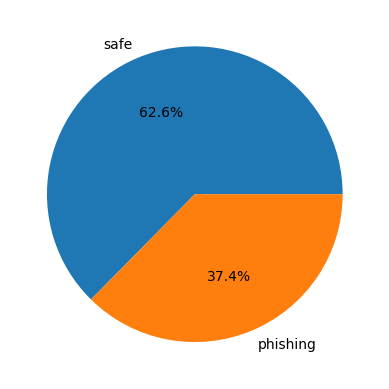

In [266]:
plt.pie(df['Email Type'].value_counts(), labels = ['safe', 'phishing'],  autopct='%1.1f%%')
plt.show()

In [267]:
! pip install nltk

In [268]:
import nltk

In [269]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\b4bik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [270]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\b4bik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [271]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\b4bik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [272]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stop_words = set(stopwords.words("english"))

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    
    tokens = [
        ps.stem(word)
        for word in tokens
        if word.isalnum() and word not in stop_words
    ]
    
    return " ".join(tokens)


In [273]:
preprocess('i loved the machine bikram@gmail.com learning lectures on YT. how about you?')

'love machin bikram learn lectur yt'

In [274]:
df['clean text']= df['Email Text'].apply(preprocess)

In [275]:
df.head()


,Email Text,Email Type,clean text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,6 1100 disc uniformitarian 1086 sex lang dick ...
1,the other side of * galicismos * * galicismo *...,0,side galicismo galicismo spanish term name imp...
2,re : equistar deal tickets are you still avail...,0,equistar deal ticket still avail assist robert...
3,\nHello I am your hot lil horny toy.\n I am...,1,hello hot lil horni toy one dream open mind pe...
4,software at incredibly low prices ( 86 % lower...,1,softwar incred low price 86 lower draperi seve...


In [276]:
from sklearn.model_selection import train_test_split

X = df["clean text"]
y = df["Email Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [277]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer() 

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score

In [279]:
svc = LinearSVC(dual = False)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [280]:
models = {
    "SVC": svc,
    "KNN": knc,
    "MultinomialNB": mnb,
    "BernoulliNB": bnb,
    "DecisionTree": dtc,
    "LogisticRegression": lrc,
    "RandomForest": rfc,
    "ExtraTrees": etc,
    "GradientBoosting": gbdt,
    "XGBoost": xgb
}


In [281]:
from sklearn.pipeline import Pipeline

In [287]:
pipe = Pipeline([
    ("vectorizer", tfidf),
    ("model", svc)
])

pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print('Recall:', recall_score(y_test, preds))

Accuracy: 0.9817559863169898
Recall: 0.9801829268292683


In [288]:
from sklearn.model_selection import cross_val_score

pipe = Pipeline([
    ("vectorizer", tfidf),
    ("model", svc)
])

recall_scores = cross_val_score(pipe, X, y, cv=5, scoring="recall")

print("CV Recall:", recall_scores)
print("Mean CV Recall:", recall_scores.mean())


CV Recall: [0.98246951 0.98323171 0.97179878 0.9740656  0.98169336]
Mean CV Recall: 0.9786517925247902


In [289]:
import joblib
joblib.dump(pipe, "phishing_model.pkl")


['phishing_model.pkl']